**Table of contents**<a id='toc0_'></a>    
- [Analyze datasets](#toc1_1_1_)    
    - [iDASH dataset](#toc1_1_1_1_)    
    - [MNIST dataset](#toc1_1_1_2_)    
    - [Diabetes dataset](#toc1_1_1_3_)    
    - [Framingham dataset](#toc1_1_1_4_)    
    - [Heart dataset](#toc1_1_1_5_)    
- [ Preprocessing data](#toc1_1_2_)    
    - [MNIST dataset](#toc1_1_2_1_)    
    - [Diabetes dataset](#toc1_1_2_2_)    
    - [Framingham dataset](#toc1_1_2_3_)    
    - [Heart dataset](#toc1_1_2_4_)    
- [Find polynomial approximation with the sigmoid function](#toc1_1_3_)    
- [Initialize fully homomorphic encryption tools](#toc1_1_4_)    
- [HE Logistic Regression model](#toc1_1_5_)    
    - [iDASH dataset](#toc1_1_5_1_1_)    
    - [MNIST dataset](#toc1_1_5_1_2_)    
    - [Diabetes dataset](#toc1_1_5_2_)    
    - [Framingham dataset](#toc1_1_5_3_)    
    - [Heart dataset](#toc1_1_5_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import sys
sys.path.append('/home/huyvu/workspace/thesis/SEAL-Python/')

### <a id='toc1_1_1_'></a>[Analyze datasets](#toc0_)

#### <a id='toc1_1_1_1_'></a>[iDASH dataset](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

iDASH_df = pd.read_csv("./data/idash18x1579.txt")
iDASH_df

,Cancer_status,BRCA_status,Family_history_2,SNP2,SNP7,SNP13,SNP20,SNP24,SNP25,SNP32,SNP36,SNP41,SNP55,SNP58,SNP68,SNP81,SNP87,SNP92,SNP93
0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0
2,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1
1575,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0
1576,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1577,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0


In [3]:
iDASH_df.describe()

,Cancer_status,BRCA_status,Family_history_2,SNP2,SNP7,SNP13,SNP20,SNP24,SNP25,SNP32,SNP36,SNP41,SNP55,SNP58,SNP68,SNP81,SNP87,SNP92,SNP93
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,0.526916,0.159595,0.040532,0.341355,0.333122,0.343255,0.352122,0.340089,0.330589,0.339455,0.348955,0.343889,0.335022,0.343889,0.345788,0.347055,0.340722,0.335022,0.350222
std,0.499433,0.366346,0.197266,0.474315,0.471479,0.474946,0.477783,0.473889,0.470574,0.473674,0.476791,0.475155,0.472148,0.475155,0.475775,0.476184,0.474102,0.472148,0.477190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print('Total NaN value: ', iDASH_df.isna().sum().sum())

Total NaN value:  0


<Axes: xlabel='Cancer_status', ylabel='count'>

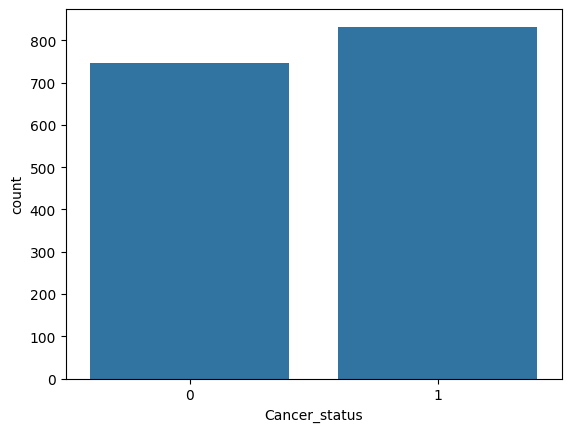

In [5]:
sns.countplot(iDASH_df, x = 'Cancer_status')

#### <a id='toc1_1_1_2_'></a>[MNIST dataset](#toc0_)

In [6]:
columns = ['label' if i == 0 else f'Pixel_{i}' for i in range(197)]
MNIST_df = pd.read_csv("./data/mnist.csv", header=None, names = columns)
new_label = MNIST_df['label'].apply(lambda x: 0 if x == -1 else 1)
MNIST_df['label'] = new_label
MNIST_df

,label,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_187,Pixel_188,Pixel_189,Pixel_190,Pixel_191,Pixel_192,Pixel_193,Pixel_194,Pixel_195,Pixel_196
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
MNIST_df.describe()

,label,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_187,Pixel_188,Pixel_189,Pixel_190,Pixel_191,Pixel_192,Pixel_193,Pixel_194,Pixel_195,Pixel_196
count,1984.000000,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,...,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.0,1984.0,1984.0
mean,0.509073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181452,0.105343,0.104839,0.153226,0.159274,0.050403,0.016129,0.0,0.0,0.0
std,0.500044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.123453,2.350200,2.762419,3.686219,4.013069,2.013189,0.718421,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.000000,72.000000,94.000000,118.000000,123.000000,89.000000,32.000000,0.0,0.0,0.0


In [8]:
MNIST_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Columns: 197 entries, label to Pixel_196
dtypes: int64(197)
memory usage: 3.0 MB


In [9]:
print('Total NaN values: ', MNIST_df.isna().sum().sum())

Total NaN values:  0


<Axes: xlabel='label', ylabel='count'>

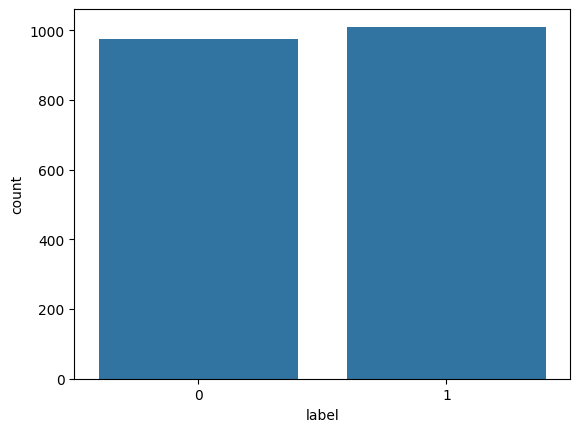

In [10]:
sns.countplot(MNIST_df, x = 'label')

#### <a id='toc1_1_1_3_'></a>[Diabetes dataset](#toc0_)

In [11]:
diabetes_df = pd.read_csv("./data/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
print('Total NaN value: ', diabetes_df.isna().sum().sum())

Total NaN value:  0


<Axes: xlabel='Outcome', ylabel='count'>

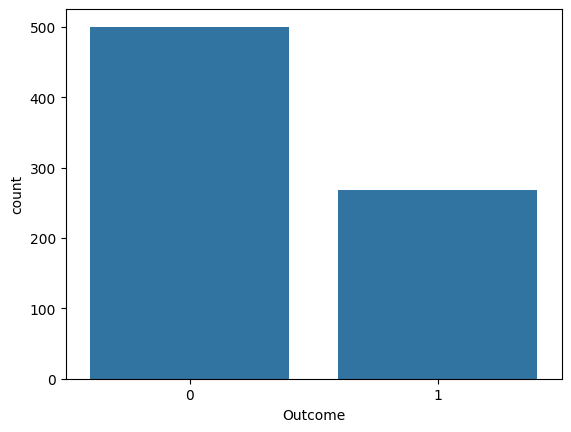

In [15]:
sns.countplot(diabetes_df, x = 'Outcome')   # imbalance 

#### <a id='toc1_1_1_4_'></a>[Heart disease dataset](#toc0_)

In [16]:
framingham_df = pd.read_csv("./data/framingham.csv")
framingham_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [17]:
framingham_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [18]:
framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [19]:
print('Total NaN value: ', framingham_df.isna().sum().sum())

Total NaN value:  645


In [20]:
framingham_df = framingham_df.dropna().reset_index(drop=True)
framingham_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [21]:
framingham_df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

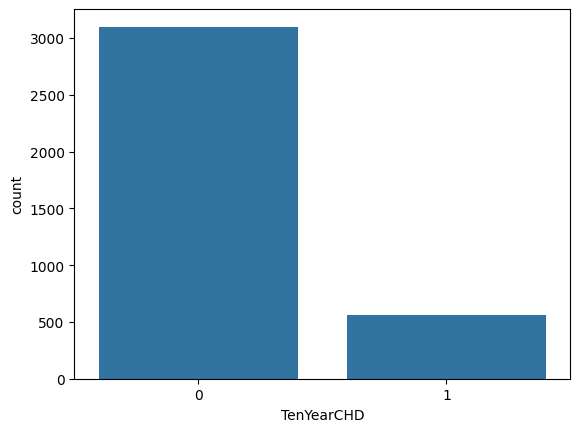

In [22]:
sns.countplot(framingham_df, x = 'TenYearCHD')  # imbalance 

#### <a id='toc1_1_1_5_'></a>[Heart attack dataset](#toc0_)

In [23]:
heart_df = pd.read_csv("./data/heart.csv")
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
print('Total NaN value: ', heart_df.isna().sum().sum())

Total NaN value:  0


<Axes: xlabel='output', ylabel='count'>

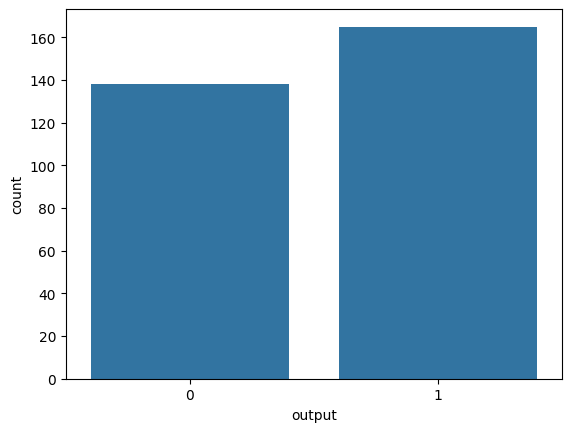

In [27]:
sns.countplot(heart_df, x = 'output')

### <a id='toc1_1_2_'></a>[ Preprocessing data](#toc0_)

* Scaling and balancing imbalanced dataset

#### <a id='toc1_1_2_1_'></a>[MNIST dataset](#toc0_)

In [28]:
"""
Scale the range of pixel values from [0-256) to [0-8).
"""
def normalizeMNISTData(df):
    columns = MNIST_df.columns.tolist()
    columns.remove('label')
    
    for col in columns:
        MNIST_df[col] =(MNIST_df[col]/32).astype('int32')
        
    return df

normalized_MNIST_df = normalizeMNISTData(MNIST_df)
normalized_MNIST_df

,label,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_187,Pixel_188,Pixel_189,Pixel_190,Pixel_191,Pixel_192,Pixel_193,Pixel_194,Pixel_195,Pixel_196
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
normalized_MNIST_df.describe()

,label,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_187,Pixel_188,Pixel_189,Pixel_190,Pixel_191,Pixel_192,Pixel_193,Pixel_194,Pixel_195,Pixel_196
count,1984.000000,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,...,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.0,1984.0,1984.0
mean,0.509073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004032,0.002016,0.002520,0.003024,0.003528,0.001008,0.000504,0.0,0.0,0.0
std,0.500044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095189,0.054970,0.067322,0.083969,0.092523,0.044901,0.022451,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,0.0,0.0,0.0


#### <a id='toc1_1_2_2_'></a>[Diabetes dataset](#toc0_)

In [30]:
from sklearn.preprocessing import StandardScaler

columns_name = diabetes_df.columns
columns_name = columns_name.drop(['DiabetesPedigreeFunction', 'Outcome'])

filled_diabetes_df = diabetes_df[columns_name]
scaled_filled_diabetes = np.round(StandardScaler().fit_transform(filled_diabetes_df),3)
scaled_filled_diabetes_df = pd.DataFrame(scaled_filled_diabetes, columns=columns_name)
diabetes_df[columns_name] = scaled_filled_diabetes_df
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.640,0.848,0.150,0.907,-0.693,0.204,0.627,1.426,1
1,-0.845,-1.123,-0.161,0.531,-0.693,-0.684,0.351,-0.191,0
2,1.234,1.944,-0.264,-1.288,-0.693,-1.103,0.672,-0.106,1
3,-0.845,-0.998,-0.161,0.155,0.123,-0.494,0.167,-1.042,0
4,-1.142,0.504,-1.505,0.907,0.766,1.410,2.288,-0.020,1
...,...,...,...,...,...,...,...,...,...
763,1.828,-0.623,0.356,1.723,0.870,0.115,0.171,2.532,0
764,-0.548,0.035,0.046,0.405,-0.693,0.610,0.340,-0.531,0
765,0.343,0.003,0.150,0.155,0.280,-0.735,0.245,-0.276,0
766,-0.845,0.160,-0.471,-1.288,-0.693,-0.240,0.349,1.171,1


<Axes: xlabel='Outcome', ylabel='count'>

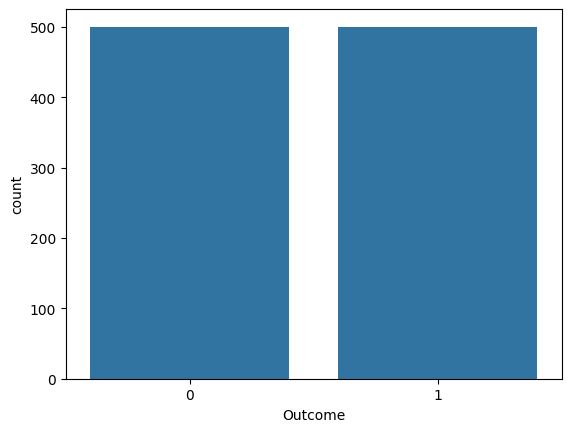

In [31]:
from functions import prepare_data
from imblearn.over_sampling import SMOTE

X_diabetes, y_diabetes = prepare_data(diabetes_df, 'Outcome')
resampled_X_diabetes, resampled_y_diabetes = SMOTE().fit_resample(X_diabetes, y_diabetes)
sns.countplot(x = resampled_y_diabetes)

#### <a id='toc1_1_2_3_'></a>[Heart disease dataset](#toc0_)

In [32]:
from sklearn.preprocessing import StandardScaler

columns_name = framingham_df.columns
columns_name = columns_name.drop(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'])

filled_framingham_df = framingham_df[columns_name]
scaled_filled_diabetes = np.round(StandardScaler().fit_transform(filled_framingham_df), 2)
scaled_filled_framingham_df = pd.DataFrame(scaled_filled_diabetes, columns=columns_name)
framingham_df[columns_name] = scaled_filled_framingham_df
framingham_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.23,4.0,0,-0.76,0.0,0,0,0,-0.95,-1.19,-1.08,0.29,0.36,-0.20,0
1,0,-0.42,2.0,0,-0.76,0.0,0,0,0,0.30,-0.51,-0.16,0.72,1.61,-0.24,0
2,1,-0.18,1.0,1,0.92,0.0,0,0,0,0.18,-0.22,-0.24,-0.11,-0.06,-0.50,0
3,0,1.34,3.0,1,1.76,0.0,0,1,0,-0.27,0.80,1.01,0.69,-0.90,0.88,1
4,0,-0.42,3.0,1,1.17,0.0,0,0,0,1.09,-0.11,0.09,-0.66,0.77,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,0.99,3.0,0,-0.76,0.0,0,1,0,-1.13,0.39,-0.16,-0.20,0.36,-0.04,0
3652,1,2.15,1.0,0,-0.76,0.0,0,1,0,-1.38,1.61,1.18,-0.65,-1.31,-0.12,1
3653,1,0.05,1.0,1,-0.67,0.0,0,1,0,1.73,2.11,0.76,0.05,-0.81,0.17,1
3654,1,0.17,3.0,1,2.85,0.0,0,0,0,-0.68,-0.27,-0.24,-1.49,-0.90,-0.58,0


<Axes: xlabel='TenYearCHD', ylabel='count'>

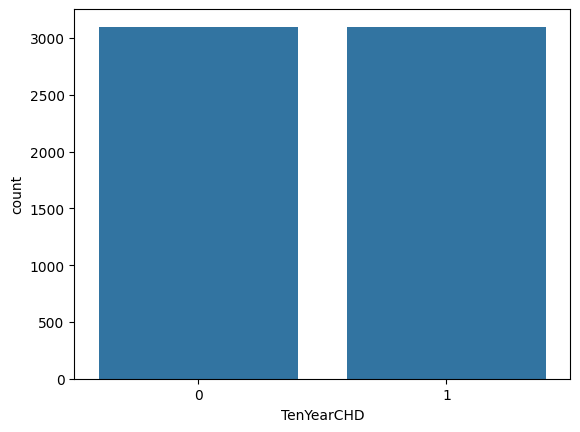

In [33]:
from functions import prepare_data
from imblearn.over_sampling import SMOTE

X_framingham, y_framingham = prepare_data(framingham_df, 'TenYearCHD')
resampled_X_framingham, resampled_y_framingham = SMOTE().fit_resample(X_framingham, y_framingham)
sns.countplot(x = resampled_y_framingham)

#### <a id='toc1_1_2_4_'></a>[Heart attack dataset](#toc0_)

In [34]:
from sklearn.preprocessing import StandardScaler

columns_name = ['age', 'trtbps', 'chol', 'thalachh']

filled_heart_df = heart_df[columns_name]
scaled_filled_diabetes = np.round(StandardScaler().fit_transform(filled_heart_df), 2)
scaled_filled_heart_df = pd.DataFrame(scaled_filled_diabetes, columns=columns_name)
heart_df[columns_name] = scaled_filled_heart_df
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,2.3,0,0,1,1
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,3.5,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,1.4,2,0,2,1
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,0.8,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0,0,0.48,-0.10,0,1,-1.17,1,0.2,1,0,3,0
299,-1.03,1,3,-1.23,0.34,0,1,-0.77,0,1.2,1,0,3,0
300,1.50,1,0,0.71,-1.03,1,1,-0.38,0,3.4,1,2,3,0
301,0.29,1,0,-0.09,-2.23,0,1,-1.52,1,1.2,1,1,3,0


### <a id='toc1_1_3_'></a>[Find polynomial approximation with the sigmoid function](#toc0_)

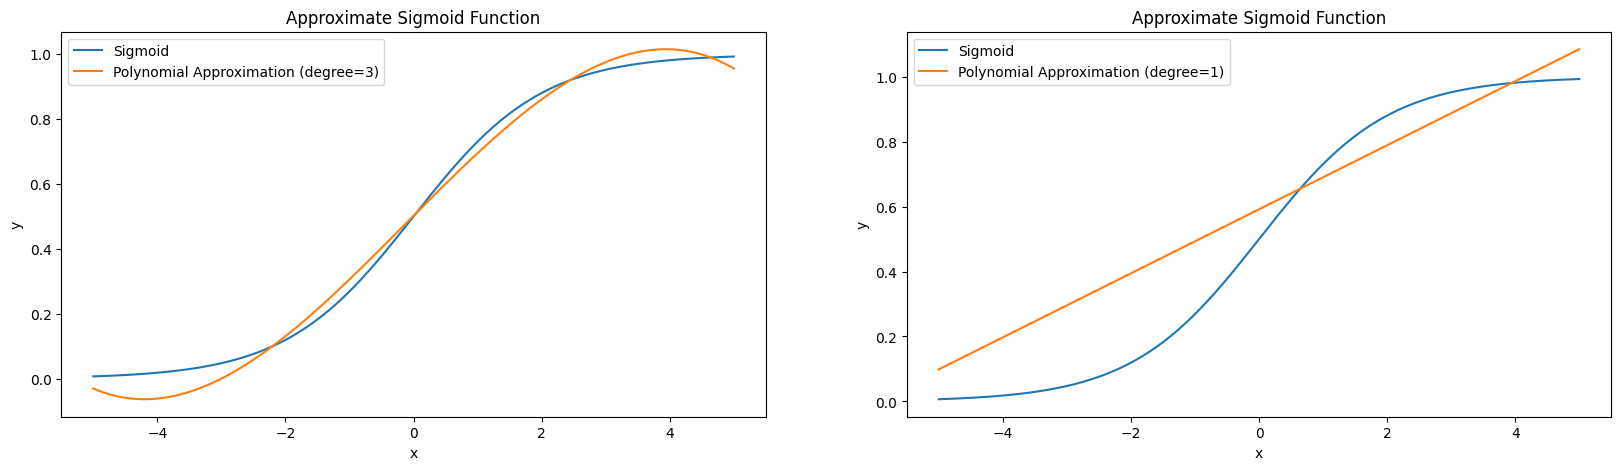

In [35]:
from remez_algorithm import remez, draw_sigmoid_graph
import mpmath as mp

function = lambda x: 1/(1+mp.exp(-x))
interval = [-5, 5]
degree = [3, 1]
poly_coeffs_degree_3, max_error_degree_3 = remez(function, degree[0], interval)
poly_coeffs_degree_1, max_error_degree_1 = remez(function, degree[1], interval)
poly_coeffs = [poly_coeffs_degree_3, poly_coeffs_degree_1]

draw_sigmoid_graph(poly_coeffs, degree, interval, function)

### <a id='toc1_1_4_'></a>[Initialize fully homomorphic encryption tools](#toc0_)

In [36]:
from homomorphic_encryption_functions import setup_ckks_params, create_tools
from seal import *  # type: ignore

poly_modulus_degree = 2**14
coeff_modulus_chain = [60, 50, 50, 50, 50, 50, 50, 60]

scale = 2.0 ** 50
context = setup_ckks_params(poly_modulus_degree, coeff_modulus_chain)
secret_key, public_key, relin_keys, galois_keys, encryptor, decryptor, evaluator, ckks_encoder = create_tools(context)
slot_count = ckks_encoder.slot_count()

/
| Encryption parameters
| scheme: ckks
| poly_modulus_degree: 16384
| coeff_modulus size: 420(60 + 50 + 50 + 50 + 50 + 50 + 50 + 60) bits
\


In [37]:
import time
from homomorphic_encryption_functions import encrypt_feature

dfs = [['iDASH', iDASH_df], ['MNIST', MNIST_df], ['diabetes' ,diabetes_df], ['heart disease', framingham_df], ['heart attack', heart_df]]
for df in dfs:
    start_time = time.time()
    encrypt_feature(df[1].values, encryptor, ckks_encoder, scale, slot_count)
    end_time = time.time()
    print(f"+ {df[0]} - Encrypt time:{end_time - start_time} seconds")

+ iDASH - Encrypt time:0.4465515613555908 seconds
+ MNIST - Encrypt time:4.086537837982178 seconds
+ diabetes - Encrypt time:0.17582130432128906 seconds
+ heart disease - Encrypt time:0.31504011154174805 seconds
+ heart attack - Encrypt time:0.2743196487426758 seconds


### <a id='toc1_1_5_'></a>[HE Logistic Regression model](#toc0_)

In [38]:
from logistic_regression import LogisticRegression, average_accuracy_and_auc_score
from logistic_regression_ckks import HELogisticRegression, average_accuracy_and_auc_score_helr
import time
def train_and_evaluate_models_performance(X, y, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count):
    
    print("- Logistic Regression over unencrypted dataset...")
    lr = LogisticRegression(learning_rate=best_params['learning_rate'], num_iterations= best_params['num_iterations'], momentum=best_params['momentum'])
    start_time = time.time()
    avg_accuracy, avg_auc = average_accuracy_and_auc_score(lr, X, y) 
    end_time = time.time()
    print(f"\t+ Total training time: {(end_time - start_time):.2f}s")
    print(f"\t+ Average accuracy score: {(avg_accuracy*100):.2f}%")
    print(f"\t+ Average auc score: {avg_auc:.4f}")

    print("\n- Logistic Regression over encrypted dataset...\n")
    num_iterations = best_params['num_iterations']
    helr  = HELogisticRegression(learning_rate=best_params['learning_rate'], momentum=best_params['momentum'])
    start_time = time.time()
    avg_accuracy_helr, avg_auc_helr = average_accuracy_and_auc_score_helr(helr, num_iterations, X, y, encryptor, decryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)
    end_time = time.time()
    execution_time = end_time - start_time
    minutes = int(execution_time // 60)
    seconds = execution_time % 60
    print(f"\t+ Total training time: {minutes}m{seconds:.2f}s")
    print(f"\t+ Average accuracy score: {(avg_accuracy_helr*100):.2f}%")
    print(f"\t+ Average auc score: {avg_auc_helr:.4f}")

##### <a id='toc1_1_5_1_1_'></a>[iDASH dataset](#toc0_)

In [39]:
from functions import prepare_data

X_idash, y_idash = prepare_data(iDASH_df, target = 'Cancer_status')

In [40]:
from grid_search import grid_search_lr

params_grid = {
    'learning_rate': [0.001, 0.0001, 0.00001],
    'num_iterations': [10, 15, 20, 25],
    'momentum': [0.7, 0.8, 0.9]
}

best_params, best_score = grid_search_lr(X_idash, y_idash, params_grid)
print(f'Best params: {best_params} with score {best_score}')


Best params: {'learning_rate': 0.001, 'num_iterations': 25, 'momentum': 0.9} with score 0.6973726840483201


In [41]:
train_and_evaluate_models_performance(X_idash, y_idash, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)

- Logistic Regression over unencrypted dataset...
	+ Total training time: 1.84s
	+ Average accuracy score: 63.27%
	+ Average auc score: 0.6924

- Logistic Regression over encrypted dataset...

	+ Total training time: 9m29.26s
	+ Average accuracy score: 49.08%
	+ Average auc score: 0.5056


##### <a id='toc1_1_5_1_2_'></a>[MNIST dataset](#toc0_)

In [42]:
from functions import prepare_data

X_mnist, y_mnist = prepare_data(normalized_MNIST_df, 'label')

In [43]:
from grid_search import grid_search_lr

params_grid = {
    'learning_rate': [0.001, 0.0001, 0.00001],
    'num_iterations': [5 , 10],
    'momentum': [0.9]
}

best_params, best_score = grid_search_lr(X_mnist, y_mnist , params_grid)
print(f'Best params: {best_params} with score {best_score}')


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
train_and_evaluate_models_performance(X_mnist, y_mnist, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)

- Logistic Regression over unencrypted dataset...
	+ Total training time: 0.48s
	+ Average accuracy score: 94.81%
	+ Average auc score: 0.9874

- Logistic Regression over encrypted dataset...

	+ Total training time: 38m39.89s
	+ Average accuracy score: 50.81%
	+ Average auc score: 0.6214


#### <a id='toc1_1_5_2_'></a>[Diabetes dataset](#toc0_)

In [ ]:
from grid_search import grid_search_lr

params_grid = {
    'learning_rate': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    'num_iterations': [5, 10, 15, 20],
    'momentum': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

best_params, best_score = grid_search_lr(resampled_X_diabetes, resampled_y_diabetes , params_grid)
print(f'Best params: {best_params} with score {best_score}')


Best params: {'learning_rate': 0.0005, 'num_iterations': 20, 'momentum': 0.7} with score 0.838134590782303


In [ ]:
train_and_evaluate_models_performance(resampled_X_diabetes, resampled_y_diabetes, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)

- Logistic Regression over unencrypted dataset...
	+ Total training time: 0.06s
	+ Average accuracy score: 75.10%
	+ Average auc score: 0.8350

- Logistic Regression over encrypted dataset...



	+ Total training time: 3m31.53s
	+ Average accuracy score: 75.20%
	+ Average auc score: 0.8354


#### <a id='toc1_1_5_3_'></a>[Heart disease dataset](#toc0_)

In [ ]:
from grid_search import grid_search_lr

params_grid = {
    'learning_rate': [0.0001, 0.0002, 0.0003],
    'num_iterations': [5, 10, 15, 20],
    'momentum': [0.7, 0.8, 0.9]
}

best_params, best_score = grid_search_lr(resampled_X_framingham, resampled_y_framingham , params_grid)
print(f'Best params: {best_params} with score {best_score}')


Best params: {'learning_rate': 0.0002, 'num_iterations': 20, 'momentum': 0.9} with score 0.7380256578533702


In [ ]:
train_and_evaluate_models_performance(resampled_X_framingham, resampled_y_framingham, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)

- Logistic Regression over unencrypted dataset...
	+ Total training time: 0.23s
	+ Average accuracy score: 68.38%
	+ Average auc score: 0.7394

- Logistic Regression over encrypted dataset...



	+ Total training time: 6m21.99s
	+ Average accuracy score: 68.17%
	+ Average auc score: 0.7392


#### <a id='toc1_1_5_4_'></a>[Heart attack dataset](#toc0_)

In [ ]:
from functions import prepare_data

X_heart, y_heart = prepare_data(heart_df, 'output')

In [ ]:
from grid_search import grid_search_lr

params_grid = {
    'learning_rate': [0.001, 0.0001, 0.00001],
    'num_iterations': [10, 20, 30, 40, 50],
    'momentum': [0.7, 0.8, 0.9]
}

best_params, best_score = grid_search_lr(X_heart, y_heart , params_grid)
print(f'Best params: {best_params} with score {best_score}')

Best params: {'learning_rate': 0.001, 'num_iterations': 20, 'momentum': 0.7} with score 0.9001821599309991


In [ ]:
train_and_evaluate_models_performance(X_heart, y_heart, best_params, encryptor, ckks_encoder, scale, evaluator, relin_keys, galois_keys, slot_count)

- Logistic Regression over unencrypted dataset...
	+ Total training time: 0.10s
	+ Average accuracy score: 81.52%
	+ Average auc score: 0.8844

- Logistic Regression over encrypted dataset...

	+ Total training time: 5m36.70s
	+ Average accuracy score: 80.85%
	+ Average auc score: 0.8830


: 